# Deep Learning


In your project, you will pick a dataset (not the same as in the previous homeworks) and describe the problem you would like to solve. Include a link to the dataset source. Next, you should pick a Deep Learning Framework that you would like to use to implement your 2-layer Neural Network.

### Task 1 (25 points): Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)


**RESEARCH ON NEURAL NETWORKS**

While studying about Neural networks the first thing that I researched was that why actaully we need neural networks and deep learning in the first place when we already had several machine learning algorithms that could solve lot of real world problems and time consuming tasks. It was because the machine learning algorithms were limited to process just few 10s or 100s of variables which is again huge but not as huge as the datasets we gather these days. Deep learning on the other hand can solve problems containing 100s and 1000s of variables, it can also help us solve problems which have high dimensions of data as well as process huge data contaning image data.  

To build a basic artificial neural network from scratch, the followingare five major steps can be followed: 

1. Add an input layer
2. Add Weights and bias
3. Add an output layer
4. Calcultae weighted sum of inputs
5. Predict the output using an activation function (like Rectified Linear Unit, Sigmoid, Hyperbolic tangent, etc.)

However, since the inception of AI/ML, lot of libraries and packages have been built in Python to implement Neural Networks. 


Back : 
The goal of back-propagation training is to minimize the squared error. To do that, the gradient of the error function must be calculated.The gradient is a calculus derivative with a value like +1.23 or -0.33. The sign of the gradient tells you whether to increase or decrease the weights and biases in order to reduce error. The magnitude of the gradient is used, along with the learning rate, to determine how much to increase or decrease the weights and biases.


I used the follwing resources which includes several websites as well as videos available on Youtube.com to learn and understand about Neural Networks.  

    https://www.youtube.com/watch?v=9UBqkUJVP4g  
    https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76
    https://www.kaggle.com/shivamb/a-very-comprehensive-tutorial-nn-cnn
    

#### Defining & Plotting Activation Functions

In [1]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z


def tanh(Z):
    A = np.tanh(Z)
    return A, Z


def relu(Z):
    A = np.maximum(0, Z)
    return A, Z


def leaky_relu(Z):
    A = np.maximum(0.1 * Z, Z)
    return A, Z

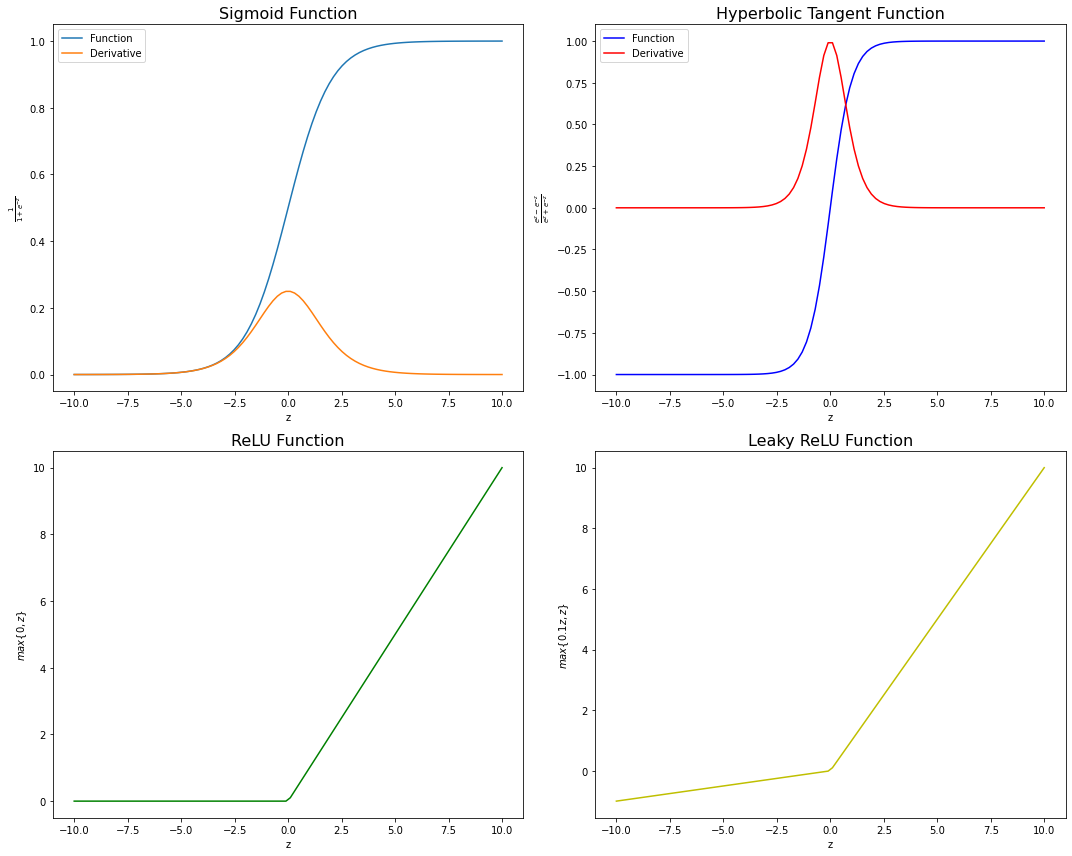

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the activation functions from above: 

z = np.linspace(-10, 10, 100)

# Computes post-activation outputs
A_sigmoid, z = sigmoid(z)
A_tanh, z = tanh(z)
A_relu, z = relu(z)
A_leaky_relu, z = leaky_relu(z)

# Plotting sigmoid

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.plot(z, A_sigmoid, label="Function")
plt.plot(z, A_sigmoid * (1 - A_sigmoid), label = "Derivative") 
plt.legend(loc="upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{1}{1 + e^{-z}}$")
plt.title("Sigmoid Function", fontsize=16)

# Plotting tanh

plt.subplot(2, 2, 2)
plt.plot(z, A_tanh, 'b', label = "Function")
plt.plot(z, 1 - np.square(A_tanh), 'r',label="Derivative") 
plt.legend(loc="upper left")
plt.xlabel("z")
plt.ylabel(r"$\frac{e^z - e^{-z}}{e^z + e^{-z}}$") 
plt.title("Hyperbolic Tangent Function", fontsize=16)

# plotting relu

plt.subplot(2, 2, 3)
plt.plot(z, A_relu, 'g')
plt.xlabel("z")
plt.ylabel(r"$max\{0, z\}$")
plt.title("ReLU Function", fontsize=16)

# plot leaky relu

plt.subplot(2, 2, 4)
plt.plot(z, A_leaky_relu, 'y')
plt.xlabel("z")
plt.ylabel(r"$max\{0.1z, z\}$")
plt.title("Leaky ReLU Function", fontsize=16)
plt.tight_layout();

### Task 2 (60 points): Once you have figured the resources you need for the project, design, and implement your project. The project must include the following steps (it’s not limited to these steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement mini-batch gradient descent to train your model. In this step it is up to you
as someone in charge of their project to improvise using optimization algorithms
(Adams, RMSProp etc.) and/or regularization.
6. Present the results using the test set.

I chose the Modified National Institute of Standards and Technology database (MNIST) dataset as it is one of the most basic datsets used to implement Neural Networks at a beginner level. The MNIST database contains 60,000 training images and 10,000 testing images. The MNIST dataset is also a suitable dataset for handwritten digit classification

In [3]:
#Importing essential Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [5]:
#Reading the dataset using tensorflow

from keras.datasets import mnist
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

**Reading dataset & Performing a train-dev-test split**

In [6]:
df_train = pd.read_csv('/Users/devanshoojain/RPI Sem 2/Projects_in_AI_ML/Homeworks/Homework_3/train.csv')

In [7]:
df_test = pd.read_csv('/Users/devanshoojain/RPI Sem 2/Projects_in_AI_ML/Homeworks/Homework_3/test.csv')

In [8]:
train_labels = np.array(df_train.loc[:,'label'])
train_data = np.array(df_train.loc[:,df_train.columns!='label'])

In [9]:
X_train, X_test = train_test_split(train_data, test_size=0.2)

In [10]:
X_train.shape

(33600, 784)

In [11]:
X_train, y_val = train_test_split(X_train, test_size=0.10)

In [12]:
y_val.shape

(3360, 784)

**EDA & Visualization**

In [13]:
# count the number of unique train labels
unique, counts = np.unique(train_labels, return_counts=True)
print("No. of unique Train labels: ", dict(zip(unique, counts)))


No. of unique Train labels:  {0: 4132, 1: 4684, 2: 4177, 3: 4351, 4: 4072, 5: 3795, 6: 4137, 7: 4401, 8: 4063, 9: 4188}


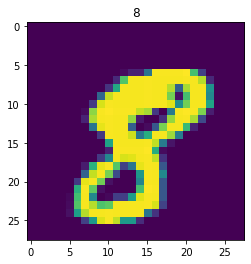

In [14]:
#Preprocessing the data

index=10;
plt.title((train_labels[index]))
plt.imshow(train_data[index].reshape(28,28))

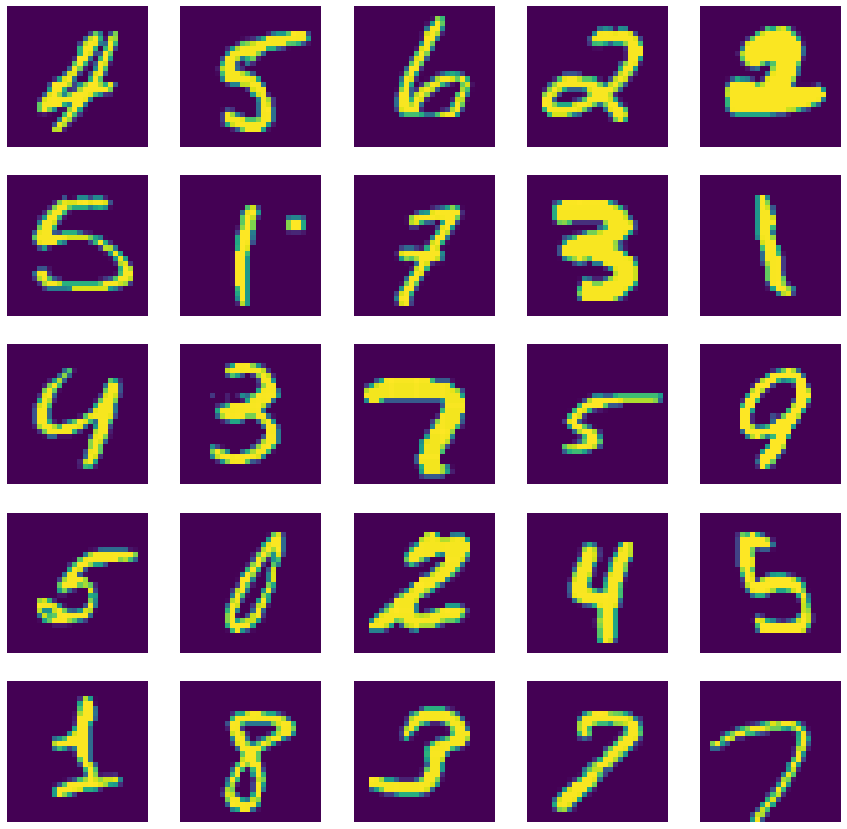

In [15]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = train_labels[indexes]

plt.figure(figsize=(15,15))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image.reshape(28,28), cmap='viridis')
    plt.axis('off')
plt.show()

In [16]:
#Using one hot encoder representation for converting train_labels

train_data = np.reshape(train_data,[784,42000])
train_label = np.zeros((10,42000))
for col in range (42000):
    val = train_labels[col]
    for row in range (10):
        if (val == row):
            train_label[val,col] = 1
            
print("train_data shape="+str(np.shape(train_data)))
print("train_label shape="+str(np.shape(train_label)))

train_data shape=(784, 42000)
train_label shape=(10, 42000)


In [17]:
# Redefining activation functions as learned above

#activation functions relu, sigmoid and softmax


def relu(Z):
    A = np.maximum(0,Z)    
    cache = Z 
    return A, cache

def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def softmax(Z):
    e_x = np.exp(Z)
    A= e_x / np.sum(np.exp(Z))  
    cache=Z
    return A,cache   

In [18]:
#derivative of activation function
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

def softmax_backward(Z,cache):
    Z=cache
    length=10  
    dZ=np.zeros((42000,10))
    Z=np.transpose(Z)
    for row in range (0,42000):
            den=(np.sum(np.exp(Z[row,:])))*(np.sum(np.exp(Z[row,:])))
            for col in range (0,10):
                sums=0
                for j in range (0,10):
                    if (j!=col):
                        sums=sums+(math.exp(Z[row,j]))
                
                dZ[row,col]=(math.exp(Z[row,col])*sums)/den           
    dZ=np.transpose(dZ)
    Z=np.transpose(Z)

    assert (dZ.shape == Z.shape)
    return dZ

***Implement forward propagation (clearly describe the activation functions and other hyper-parameters you are using).***

We will use Z = W^Tx + b where W and b are weights and bias and then apply an activation function g(z) such as ReLU or softmax. We’ll also store all variables computed and used on each layer so that it can be used in back-propagation

In [19]:
#Initializing weights and params

def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [20]:
#Forward proagation:

def linear_forward(A, W, b):
    Z = np.dot(W,A) +b
    cache = (A, W, b)
    assert(Z.shape == (W.shape[0], A.shape[1]))
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z) 
    elif activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2               
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "softmax")
    caches.append(cache)               
    return AL, caches

In [21]:
#Cost Function

def compute_cost(AL, Y):

    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    return cost

In [22]:
#Backward propagation

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)  
    db = (1/m)*np.sum(dZ, axis=1, keepdims=True);
    dA_prev = np.dot(W.T,dZ)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)  
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    M=len(layers_dims)
    current_cache = caches[M-2]
    grads["dA"+str(M-1)], grads["dW"+str(M-1)], grads["db"+str(M-1)] = linear_activation_backward(dAL, current_cache, activation = "softmax")#M-1
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    
    return grads

In [23]:
#upgrading function for weights and bias

def update_parameters(parameters, grads, learning_rate):
    for l in range(len_update-1):
        parameters["W" + str(l+1)] =parameters["W" + str(l+1)] - (learning_rate*grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate*grads["db" + str(l+1)])
    return parameters

In [24]:
def plot_graph(cost_plot):
       
    x_value=list(range(1,len(cost_plot)+1))
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.plot(x_value,cost_plot,0.,color='g')

In [29]:
#Runnung the model with 2layers

layers_dims = [784,100,10] 
len_update=len(layers_dims)

In [30]:
def L_layer_model(X, Y, layers_dims, learning_rate , num_iterations , print_cost=False):#lr was 0.009
    print("training...")
    costs = []  
    cost_plot=np.zeros(num_iterations)
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost =compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate) 
        cost_plot[i]=cost;
    
    plot_graph(cost_plot)
    return parameters

training...


<ipython-input-21-18ac3ee47784>:6: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
<ipython-input-21-18ac3ee47784>:6: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
<ipython-input-22-93771000f54e>:27: RuntimeWarning: divide by zero encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
<ipython-input-22-93771000f54e>:27: RuntimeWarning: overflow encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
<ipython-input-22-93771000f54e>:27: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
<ipython-input-18-710c2a943b45>:29: RuntimeWarning: invalid value encountered in double_scalars
  dZ[row,col]=(math.exp(Z[row,col])*sums)/den


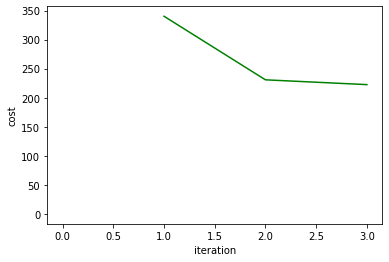

In [34]:
parameters = L_layer_model(train_data, train_label, layers_dims,learning_rate = 0.05, num_iterations =100 , print_cost = True) 

### Task 3 (15 points): In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?

I ran the model several times to finalize the hyperparameters. I tested them with the default values and then adjusting the hyperparamterters based on the results I was getting. Initially it took a lot of time testing and re running the models several times.  
I did not feel the need to add regularization since the dataset consisted of images and their were no outliers or null values. Also the model performed fairly well and hence I did not fell any requirement to usethe regularisation. Regularization is generally used when the data is overfitting. Since in this case the data was not overfitting, I chose not to use regularization. 